In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230100,37800,69200,22100
1,44500,39300,45100,10400
2,17200,45900,69300,9300
3,151500,41300,58500,18500
4,180800,10800,58400,12900


In [3]:
df.shape

(200, 4)

In [4]:
df.info

<bound method DataFrame.info of          TV  radio  newspaper  sales
0    230100  37800      69200  22100
1     44500  39300      45100  10400
2     17200  45900      69300   9300
3    151500  41300      58500  18500
4    180800  10800      58400  12900
..      ...    ...        ...    ...
195   38200   3700      13800   7600
196   94200   4900       8100   9700
197  177000   9300       6400  12800
198  283600  42000      66200  25500
199  232100   8600       8700  13400

[200 rows x 4 columns]>

In [5]:
df['total_spends']=df['TV']+df['newspaper']+df['radio']
df.head()

,TV,radio,newspaper,sales,total_spends
0,230100,37800,69200,22100,337100
1,44500,39300,45100,10400,128900
2,17200,45900,69300,9300,132400
3,151500,41300,58500,18500,251300
4,180800,10800,58400,12900,250000


In [6]:
df=df.drop(columns=['TV','radio','newspaper'])
df.head()

,sales,total_spends
0,22100,337100
1,10400,128900
2,9300,132400
3,18500,251300
4,12900,250000


In [7]:
continous = ['total_spends','sales']

In [8]:
df[continous].describe()

,total_spends,sales
count,200.000000,200.000000
mean,200860.500000,14022.500000
std,92985.180587,5217.456566
min,11700.000000,1600.000000
25%,123550.000000,10375.000000
50%,207350.000000,12900.000000
75%,281125.000000,17400.000000
max,433600.000000,27000.000000


In [9]:
df[continous].skew()

total_spends    0.049488
sales           0.407571
dtype: float64

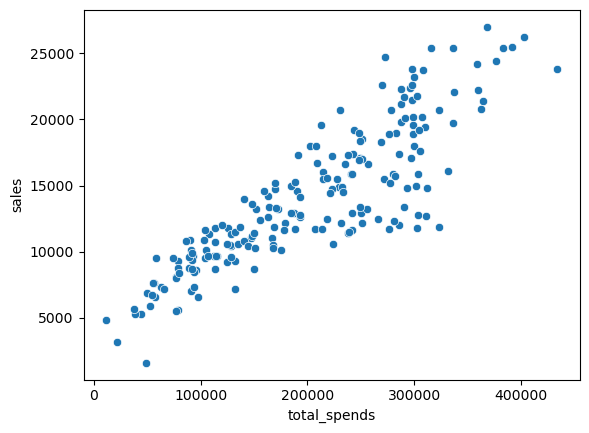

In [10]:
sns.scatterplot(x='total_spends',y='sales',data=df)
plt.show()

In [11]:
df[continous].corr()

,total_spends,sales
total_spends,1.000000,0.867712
sales,0.867712,1.000000


C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


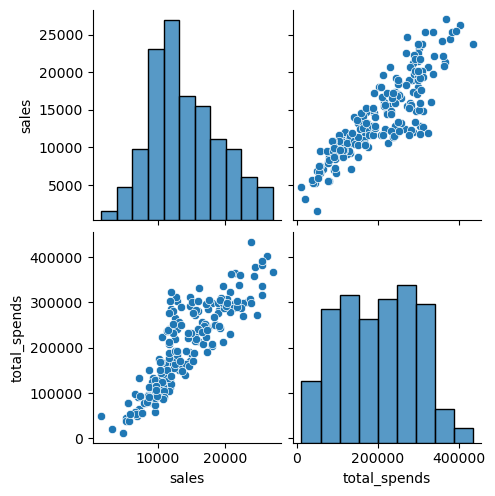

In [12]:
sns.pairplot(df)
plt.show()

In [13]:
df.isnull().sum()

sales           0
total_spends    0
dtype: int64

**Data Wangling

In [ ]:
#no encoding is required as there are no categorical data 

Create X & Y

In [16]:
x = df[['total_spends']]
y = df['sales']

In [ ]:
**Train - Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=77)

In [ ]:
**Modelling

In [21]:
#import 
from sklearn. linear_model import LinearRegression

#save the model
model = LinearRegression ()

#fit
model. fit(X_train,y_train)

print("Coefficients:",model. coef_)
print("Intercept:", model.intercept_)

Coefficients: [0.04784052]
Intercept: 4389.814518436082


**Step - 5 Evaluation

In [22]:
ypred_test = model.predict(X_test)

In [ ]:
**Mean Absolute Error 

In [23]:
from sklearn.metrics import mean_absolute_error
print('Test MAE:',mean_absolute_error(y_test,ypred_test))

Test MAE: 1915.90776501548


In [ ]:
**Mean Squared Error

In [24]:
from sklearn.metrics import mean_squared_error
print('Test MSE:',mean_squared_error(y_test,ypred_test))

Test MSE: 5868943.149727303


In [ ]:
**Root Mean Squared Error

In [25]:
print('Test RMSE:',np.sqrt(mean_squared_error(y_test,ypred_test)))

Test RMSE: 2422.590173704026


In [26]:
#Test R2

print('Test R2:',model.score(X_test,y_test))

Test R2: 0.7868779454628924


In [ ]:
**Model Selection

#1: Check whether model is good or either having overfitting/underfittig problem

In [35]:
# prediction on train data

ypred_train = model. predict(X_train)

#Train R2

print("Train R2:",model.score(X_train,y_train))

Train R2: 0.7426281082244577


In [38]:
#2 check whether the Test Accuracy = Cross Validation Score

from sklearn. model_selection import cross_val_score
scores = cross_val_score (model, x,y, cv=5)
print (scores)
print("Cross Validation Score:",scores.mean ())

[0.74964192 0.79455226 0.76417134 0.74872042 0.65980565]
Cross Validation Score: 0.7433783178555419


In [ ]:
#3- check whether, it satisfies the Business Problem Requirements
#4-(only for Linear Regression) : Check for Assumptions

In [ ]:
**1. Linearity of Errors

In [39]:
error = y_test - ypred_test

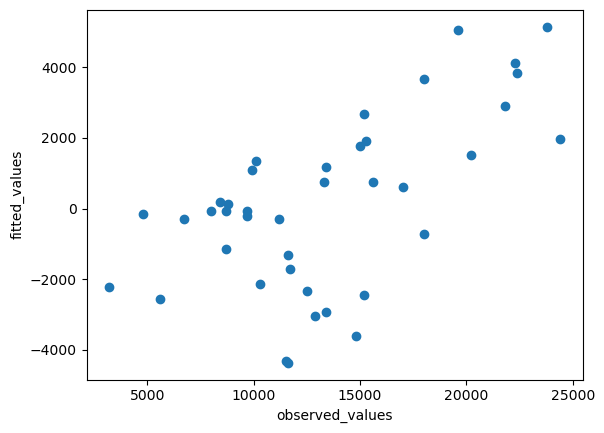

In [45]:
plt.scatter(y_test,error)
plt.xlabel('observed_values')
plt.ylabel('fitted_values')
plt.show( )

In [ ]:
**Normality of errors 

In [46]:
error.skew()

0.17729242735315792

C:\Users\ADMIN\anaconda3\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


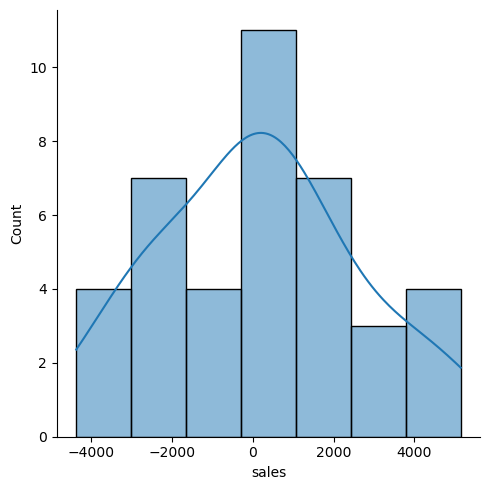

In [49]:
sns.displot(error,kde=True)
plt.show()


In [ ]:
**Equal variance of errors 

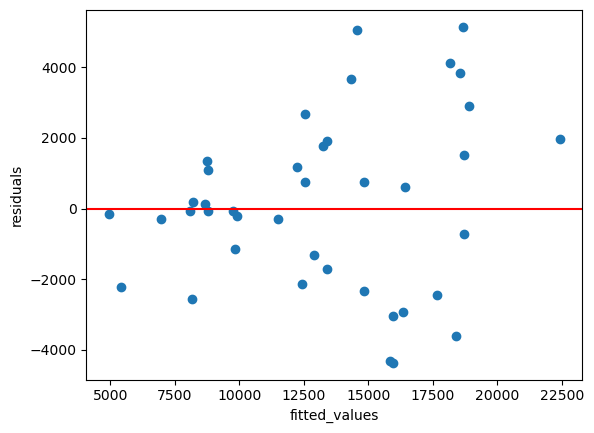

In [50]:
plt. scatter (ypred_test,error)
plt.axhline(y=0, color='red')
plt. xlabel("fitted_values")
plt.ylabel ("residuals")
plt. show()

In [ ]:
**Final Model 

In [27]:
ypred_train = model.predict(X_train)
#evalution
from sklearn.metrics import mean_squared_error
print ('Train RMSE:',np.sqrt(mean_squared_error(y_train, ypred_train)))
from sklearn.metrics import r2_score
print("train R2:", r2_score(y_train,ypred_train))

Train RMSE: 2628.0117251844995
train R2: 0.7426281082244577


In [28]:
#cross validation  Score
from sklearn.model_selection import cross_val_score
print("CV Score:",cross_val_score(model,X_train,y_train,cv=5,scoring="r2").mean())

CV Score: 0.7326556921038282


In [29]:
# prediction on test data
ypred_test = model.predict(x_test)
#evaluation on test data
print("Test RMSE:",np.sqrt(mean_squared_error(y_test,ypred_test)))
print('test R2:',r2_score(y_test,ypred_test))

Test RMSE: 2422.590173704026
test R2: 0.7868779454628924


In [30]:
model.predict([[200000]])

C:\Users\ADMIN\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13957.91946809])

In [31]:
#sales =4389.8145 + 0.04784*total_spends

sales=4389.8145 + 0.04784*200000
sales

13957.8145

**save a model

**joblib
  pickle

In [32]:
from joblib import dump
dump(model,'sales_model.joblib') #dump(modelname,name to saved)

['sales_model.joblib']